<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data
<br><br>
_Instructor:_ Tim Book, General Assembly DC

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'movies_1000.csv' and store it in a DataFrame named movies.

In [2]:
#Load the .csv file
movies = pd.read_csv("./data/imdb_1000.csv", sep=',')

In [3]:
#View a few lines of data
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### What are the number of rows and columns?

In [4]:
# Answer: There are a 979 rows and 6 columns.
movies.shape

(979, 6)

#### What are the data types of each column?

In [5]:
# Answer: Display datatypes.
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [6]:
# Answer: Use the mean function to calculate the average movie duration.
round(movies.duration.mean(),2)

120.98

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer: Use the head() and tail() functions to find the shortest and longest movies.
movies.sort_values(['duration']).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


In [8]:
movies.sort_values(['duration']).tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [9]:
#Alternative way of finding shortest and longest movies.
film_length = movies.sort_values(by=["duration"])
film_length[["title","duration"]].iloc[[0, -1]]

,title,duration
389,Freaks,64
476,Hamlet,242


#### Create a histogram of duration, choosing an "appropriate" number of bins.

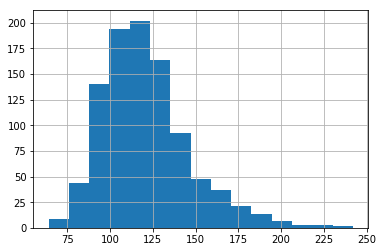

In [10]:
# Answer: Histogram of duration with twenty bins.
movies.duration.hist(bins = 15)

#### Use a box plot to display that same data.

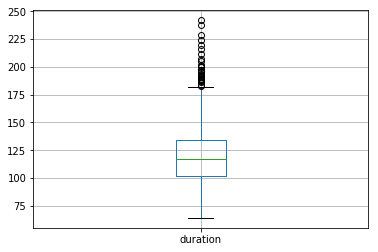

In [11]:
# Answer: Boxplot of duration.
movies.boxplot(column = "duration")

## Intermediate level

#### Count how many movies have each of the content ratings.

In [12]:
# Answer: Value counts for each content rating.
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Rating')

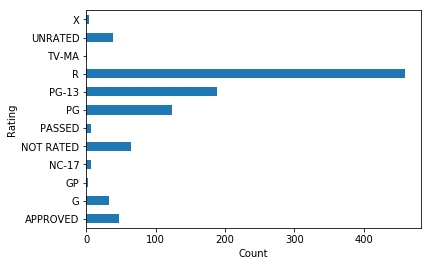

In [13]:
# Answer: Bar graph to show counts of each content rating, sorted by rating (G to UNRATED).
bar = movies.content_rating.value_counts().sort_index().plot.barh()
bar.set_xlabel("Count")
bar.set_ylabel("Rating")

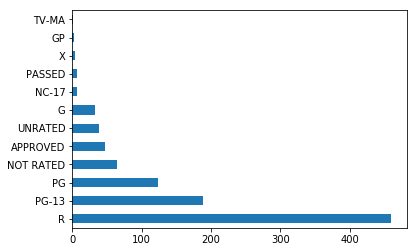

In [14]:
#Horizontal bar chart sorted by value counts.
movies["content_rating"].value_counts().plot.barh();

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [15]:
# Answer: 
movies.loc[(movies.content_rating == "NOT RATED") | (movies.content_rating == "APPROVED") | (movies.content_rating == "PASSED") | 
        (movies.content_rating == "GP"), "content_rating"] = "UNRATED"

In [16]:
#Check value counts for content_rating after change
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [17]:
# Answer: Additional content rating conversions.
movies.loc[(movies.content_rating == "X") | (movies.content_rating == "TV-MA"), "content_rating"] = "NC-17"

In [18]:
# Check counts after conversion
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [19]:
# Answer: Count missing values for each column.
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [20]:
# Answer:
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [21]:
movies.loc[movies.title=="Butch Cassidy and the Sundance Kid", 'content_rating'] = 'PG'

In [22]:
movies.loc[movies.title=="Where Eagles Dare", 'content_rating'] = 'PG'

In [23]:
movies.loc[movies.title=="True Grit", 'content_rating'] = 'PG-13'

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [24]:
# Answer: Calculate average star rating for movies 2 hours or longer.
round(movies[movies.duration >= 120].star_rating.mean(), 2)

7.95

In [25]:
# Calculate average star rating for movies under 2 hours
round(movies[movies.duration < 120].star_rating.mean(), 2)

7.84

#### Use a visualization to detect whether there is a relationship between duration and star rating.

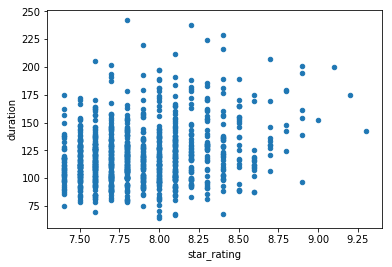

In [26]:
# Answer: There does not appear to be any correlation between duration and star rating.
movies.plot.scatter(x="star_rating", y="duration")

#### Calculate the average duration for each genre.

In [27]:
# Answer: Average duration for each genre, sorted from shortest average duration to longest.
movies.groupby('genre').duration.mean().sort_values()

genre
History       66.000000
Animation     96.596774
Film-Noir     97.333333
Horror       102.517241
Family       107.500000
Comedy       107.602564
Sci-Fi       109.000000
Fantasy      112.000000
Thriller     114.200000
Mystery      115.625000
Crime        122.298387
Action       126.485294
Drama        126.539568
Biography    131.844156
Adventure    134.840000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

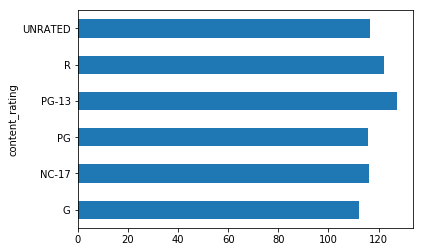

In [28]:
# Calculate average duration per content rating and display on horizontal bar chart
movies.sort_index().groupby('content_rating').duration.mean().plot(kind='barh');

#### Determine the top rated movie (by star rating) for each genre.

In [29]:
# Answer:
movies.groupby('genre').star_rating.max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [30]:
# Answer: Check if there are any duplicated movie titles.
movies.title.duplicated().sum()

4

In [31]:
#Find the duplicated entries
movies.loc[movies.title.duplicated() == True, :]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [32]:
#See if there are any duplicates when comparing all column values. There aren't so these aren't true duplicate entries.
movies.duplicated().sum()

0

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies

#### Option 1: automatically create a list of relevant genres by saving the value_counts and then filtering

In [33]:
# Answer: Calculate value counts
counts = movies['genre'].value_counts()

counts

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [34]:
#Narrow the movies data frame to include only rows where the genre has at least ten movies
movies_with_ten = movies.loc[movies['genre'].isin(counts[counts > 10].index), :]

In [35]:
#Calculate average star rating by genre
round(movies_with_ten.groupby('genre').star_rating.mean(), 2)

genre
Action       7.88
Adventure    7.93
Animation    7.91
Biography    7.86
Comedy       7.82
Crime        7.92
Drama        7.90
Horror       7.81
Mystery      7.98
Name: star_rating, dtype: float64

#### Option 2: aggregate by count and mean, then filter using the count

In [36]:
# Answer:
counts_means = movies.groupby('genre').star_rating.agg('count')

counts_means[counts_means > 10]

genre
Action       136
Adventure     75
Animation     62
Biography     77
Comedy       156
Crime        124
Drama        278
Horror        29
Mystery       16
Name: star_rating, dtype: int64

In [37]:
movies_with_ten_2 = movies.loc[movies['genre'].isin(counts_means[counts_means > 10].index), :]

In [38]:
round(movies_with_ten_2.groupby('genre').star_rating.mean(), 2)

genre
Action       7.88
Adventure    7.93
Animation    7.91
Biography    7.86
Comedy       7.82
Crime        7.92
Drama        7.90
Horror       7.81
Mystery      7.98
Name: star_rating, dtype: float64

## Bonus

#### Figure out something "interesting" using the actors data!

In [39]:
#See which movies star actresses named Uma
movies[movies.actors_list.str.contains("Uma")]

,star_rating,title,content_rating,genre,duration,actors_list
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
198,8.1,Kill Bill: Vol. 1,R,Action,111,"[u'Uma Thurman', u'David Carradine', u'Daryl H..."
354,8.0,Kill Bill: Vol. 2,R,Action,137,"[u'Uma Thurman', u'David Carradine', u'Michael..."
499,7.8,Gattaca,PG-13,Drama,106,"[u'Ethan Hawke', u'Uma Thurman', u'Jude Law']"
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."


In [40]:
#See the counts for the movies with the most actors together (probably sequels or prequels)
movies.actors_list.value_counts().head()

[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']        6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']          3
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']     2
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                  2
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']    2
Name: actors_list, dtype: int64

In [41]:
#Find the actors/actress that have starred in the most movies. This requires breaking down the lists of actors into one single column.
movies_actors = pd.DataFrame(movies)

In [42]:
# x = movies.iloc[1,5]
# x

In [43]:
# new = x.split("'")
# new[1]

In [44]:
# new[3]

In [45]:
# new[5]

In [46]:
movies_list = movies.actors_list.str.split(", u", n = 6, expand = True)

movies_actors["actor1"] = movies_list[0].str.lstrip("[u',.!? \n\t")
movies_actors["actor1"] = movies_actors["actor1"].str.rstrip("[u',.!? \n\t")
movies_actors["actor1"] = movies_actors["actor1"].str.strip('"')

movies_actors["actor2"] = movies_list[1].str.lstrip("',.!? \n\t")
movies_actors["actor2"] = movies_actors["actor2"].str.rstrip("[',.!? \n\t")
movies_actors["actor2"] = movies_actors["actor2"].str.strip('"')

movies_actors["actor3"] = movies_list[2].str.lstrip("',.!?] \n\t")
movies_actors["actor3"] = movies_actors["actor3"].str.rstrip("['],.!? \n\t")
movies_actors["actor3"] = movies_actors["actor3"].str.strip('"')

movies_actors.head()

,star_rating,title,content_rating,genre,duration,actors_list,actor1,actor2,actor3
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",Tim Robbins,Morgan Freeman,Bob Gunton
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",Marlon Brando,Al Pacino,James Caan
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",Al Pacino,Robert De Niro,Robert Duvall
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",Christian Bale,Heath Ledger,Aaron Eckhart
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",John Travolta,Uma Thurman,Samuel L. Jackson


In [47]:
movies_actor1 = pd.DataFrame(movies_actors,columns = ['actor1'])
movies_actor1 = movies_actor1.rename(columns={"actor1" : "actor"})

In [48]:
movies_actor2 = pd.DataFrame(movies_actors,columns = ['actor2'])
movies_actor2 = movies_actor1.rename(columns={"actor2": "actor"})
movies_actor3 = pd.DataFrame(movies_actors,columns = ['actor3'])
movies_actor3 = movies_actor3.rename(columns={"actor3": "actor"})

result = pd.concat([movies_actor1, movies_actor2, movies_actor3], sort="False", axis = 0)

In [49]:
#Find the actors/actresses in the most movies
result.actor.value_counts().head()

Robert De Niro    29
Tom Hanks         24
Clint Eastwood    22
Johnny Depp       20
Brad Pitt         20
Name: actor, dtype: int64